In [104]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import csv
from sklearn.manifold import TSNE
#from plotnine import *
import matplotlib.pyplot as plt

In [91]:
info2 = pd.read_csv('tweets.v1.4.csv', index_col = False)
info2


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [92]:
mms = MinMaxScaler();

info2_nostr = info2.drop(["Name","Alignment"],axis=1)
normed = mms.fit_transform(info2_nostr)
distances = pairwise_distances(normed)
distances
#(ggplot(pd.DataFrame({"distance":distances.reshape(np.product(distances.shape))}),aes("distance")) + geom_histogram())

array([[0.        , 0.87777177, 0.53872304, ..., 1.14229176, 0.84341809,
        0.81562225],
       [0.87777177, 0.        , 1.0799604 , ..., 0.79420037, 1.35175379,
        1.47180955],
       [0.53872304, 1.0799604 , 0.        , ..., 1.30114949, 0.74188002,
        1.01184548],
       ...,
       [1.14229176, 0.79420037, 1.30114949, ..., 0.        , 1.17433258,
        1.33359775],
       [0.84341809, 1.35175379, 0.74188002, ..., 1.17433258, 0.        ,
        0.90089462],
       [0.81562225, 1.47180955, 1.01184548, ..., 1.33359775, 0.90089462,
        0.        ]])

In [93]:
adj = distances < 1
adj

array([[ True,  True,  True, ..., False,  True,  True],
       [ True,  True, False, ...,  True, False, False],
       [ True, False,  True, ..., False,  True, False],
       ...,
       [False,  True, False, ...,  True, False, False],
       [ True, False,  True, ..., False,  True,  True],
       [ True, False, False, ..., False,  True,  True]])

In [94]:
sc = SpectralClustering(3,affinity="precomputed")
info2['cluster'] = sc.fit_predict(adj);

In [101]:
projection = TSNE(n_components=2).fit_transform(normed);
lowd = pd.DataFrame(projection, columns=["X1","X2"])
lowd["cluster"] = info2["cluster"];

lowd
#(ggplot(lowd,aes("X1","X2")) + geom_point(aes(color="cluster")))

,X1,X2,cluster,Alignment
0,2.051996,1.565940,0,good
1,-12.473125,10.856424,0,good
2,13.316690,10.158508,0,good
3,-10.637208,20.054314,2,good
4,-12.760007,17.296890,2,bad
...,...,...,...,...
606,11.559826,0.399235,0,good
607,4.752196,0.895232,0,good
608,-9.007954,17.117823,2,good
609,5.391749,10.800343,0,good


In [139]:
lowd.replace(r'^\s*$', np.nan, regex=True)
lowd.to_csv('lowd.csv',index=False)

In [142]:
lowd["color"] = info2["Alignment"];
for index, item in lowd.iterrows():
    lowd['color'][index]='white'
    if lowd['Alignment'][index]=='good':
        lowd['color'][index]='red'
    elif lowd['Alignment'][index]=='bad':
        lowd['color'][index]='blue'
    elif lowd['Alignment'][index]=='neutral':
        lowd['color'][index]='green'

C:\Users\lzm11\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lzm11\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lzm11\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Us

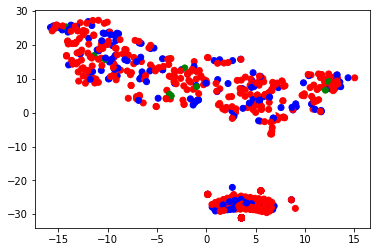

In [144]:
colors={'good':'red','bad':'green','neutral':'blue'}
fig, ax = plt.subplots()
ax.scatter(lowd['X1'], lowd['X2'], c=lowd['color'])
plt.show()
#lowd.plot(x ='X1', y='X2', kind = 'scatter', color=colors)